# Team 9: Study of geographic hotspots for meteorite falls and mass variations

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt

In [21]:
file_path = 'C:/Users/QIQI/UCSD/2023-fall/ece143/ece143_project-main/Data_set/Meteorite_Landings.csv'
meteorite_data = pd.read_csv(file_path)
# Display the first few rows of the dataset to understand its structure
meteorite_data.head()
    # Checking for missing values in 'fall' and 'year' columns
missing_values = meteorite_data[['fall', 'year','GeoLocation']].isnull().sum()


In [22]:
def get_continent(location):
    temp=location.split(',')
    lati=temp[0][1:]
    longi=temp[1][:-1]
    latitude=float(lati)
    longitude=float(longi)
    if 7 <= latitude <= 71.59 and -168.05 <= longitude <= -55.39:
        return 'North Americas'
    elif -90 <= latitude <= -63.28 and -180 <= longitude <= 180:
        return 'Antarctica'
    elif 36 <= latitude <= 71.08 and -9.31 <= longitude <= 66.1:
        return 'Europe'
    elif -34.51 <= latitude <= 37.21 and -17.34 <= longitude <= 51.24:
        return 'Africa'
    elif -53.54 <= latitude <= 12.28 and -81.2 <= longitude <= -34.46:
        return 'South Americas'
    elif -39.08 <= latitude <= 10.54 and 113.09 <= longitude <= 153.39:
        return 'Oceania'
    elif 1.16 <= latitude <= 71.43:
        if 26.1 <= longitude <= 180 or -180 <= longitude <= -169.45:
            return 'Asia'
        else:
            return 'NA' 

In [23]:
# Converting 'year' to integer (if no missing values are present)
if missing_values['year'] == 0:
    meteorite_data['year'] = meteorite_data['year'].astype(int)
if missing_values['GeoLocation'] == 0:
    meteorite_data['GeoLocation'] = meteorite_data['GeoLocation'].astype(int)

In [24]:
# Checking unique values in 'fall' column
unique_fall_values = meteorite_data['fall'].unique()

missing_values
unique_fall_values
    # Removing records with missing values in the 'year' column

array(['Fell', 'Found'], dtype=object)

In [25]:
meteorite_data_cleaned = meteorite_data.dropna(subset=['year','GeoLocation'])

# Confirming the removal of missing values
remaining_missing_values = meteorite_data_cleaned[['fall', 'year','GeoLocation']].isnull().sum()
remaining_missing_values, meteorite_data_cleaned.shape

(fall           0
 year           0
 GeoLocation    0
 dtype: int64,
 (38223, 10))

In [26]:
meteorite_data_cleaned['Continent'] = meteorite_data_cleaned.apply(lambda row: get_continent(row['GeoLocation']), axis=1) 

C:\Users\QIQI\AppData\Local\Temp\ipykernel_10720\2456483898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.com/v3/__https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html*returning-a-view-versus-a-copy*5Cn__;IyU!!Mih3wA!GeW3ggaBsjBW-PCpkE7atf2zJmhOWmNdeKU2G5wuU3gwnwuOa_FcPcG9v_GDaU_oEmICU8YfTzr__18Q$   meteorite_data_cleaned['Continent'] = meteorite_data_cleaned.apply(lambda row: get_continent(row['GeoLocation']), axis=1)


In [27]:
meteorite_data_cleaned.to_csv('get_continent.csv', index=False)

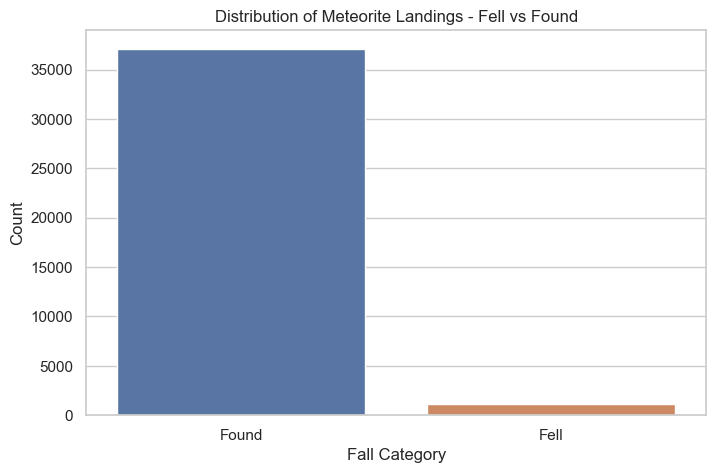

In [28]:
sns.set(style="whitegrid")

# 1. Distribution of 'Fall' Categories
fall_counts = meteorite_data_cleaned['fall'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=fall_counts.index, y=fall_counts.values)
plt.title('Distribution of Meteorite Landings - Fell vs Found')
plt.xlabel('Fall Category')
plt.ylabel('Count')
plt.show()


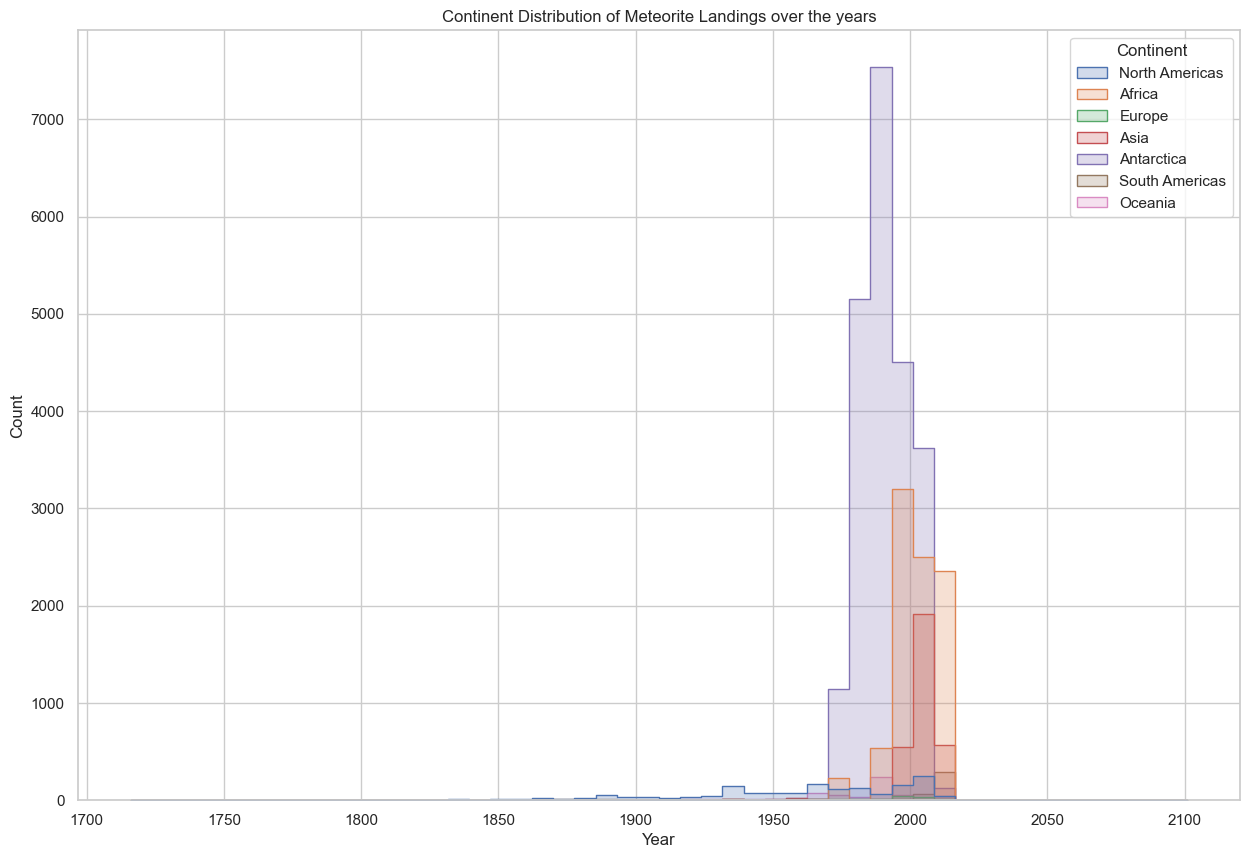

In [29]:
# 2. Yearly Trends
plt.figure(figsize=(15, 10))
fell_data = meteorite_data_cleaned[meteorite_data_cleaned['year'] > 1700]
fell_data1=fell_data[fell_data['fall'] == 'Found']
sns.histplot(data=fell_data1, x='year', hue='Continent', element='step', bins=50)
plt.title('Continent Distribution of Meteorite Landings over the years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [30]:
meteorite_data_cleaned['decade'] = (meteorite_data_cleaned['year'] // 10) * 10

    # Create a contingency table
contingency_table = pd.crosstab(meteorite_data_cleaned['decade'], meteorite_data_cleaned['fall'])

C:\Users\QIQI\AppData\Local\Temp\ipykernel_10720\3510584915.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://urldefense.com/v3/__https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html*returning-a-view-versus-a-copy*5Cn__;IyU!!Mih3wA!GeW3ggaBsjBW-PCpkE7atf2zJmhOWmNdeKU2G5wuU3gwnwuOa_FcPcG9v_GDaU_oEmICU8YfTzr__18Q$   meteorite_data_cleaned['decade'] = (meteorite_data_cleaned['year'] // 10) * 10


In [31]:
chi2_stat,p_val

(13089.91675643035, 0.0)

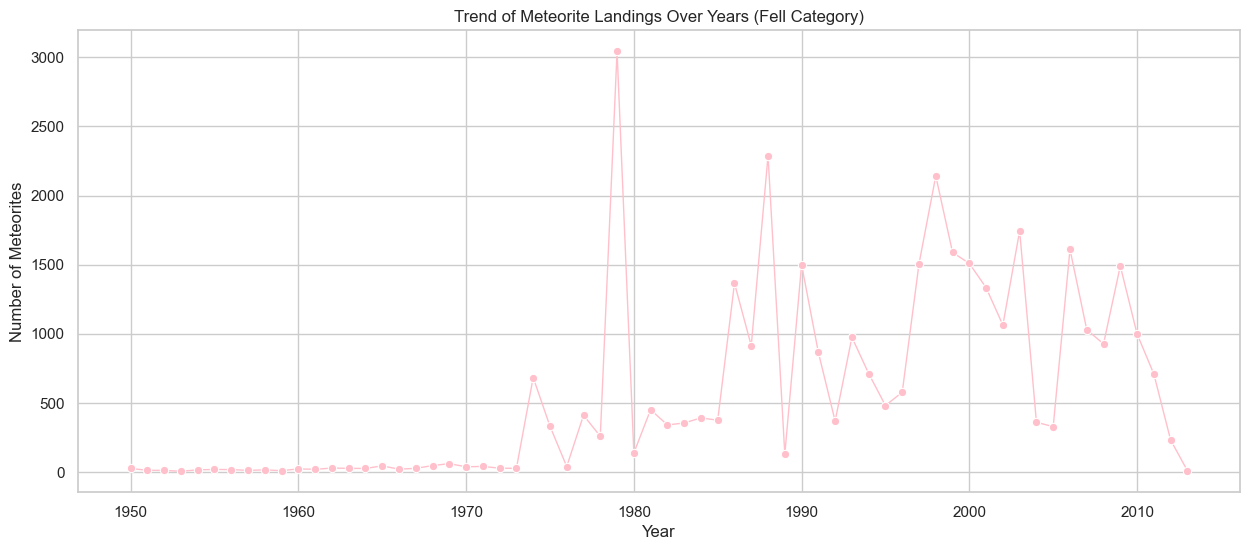

In [32]:
fell_data = meteorite_data_cleaned[meteorite_data_cleaned['fall'] == 'Found']
fell_data1=fell_data[fell_data['year']>=1950]
# Grouping by year for 'Fell' category
fell_data2=fell_data1[fell_data1['year']<=2020]
fell_line_chart_data = fell_data2.groupby('year').size()

# Plotting the line chart for the 'Fell' category
plt.figure(figsize=(15, 6))
sns.lineplot(data=fell_line_chart_data, color="pink", linewidth=1,marker='o')
plt.title('Trend of Meteorite Landings Over Years (Fell Category)')
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
plt.show()

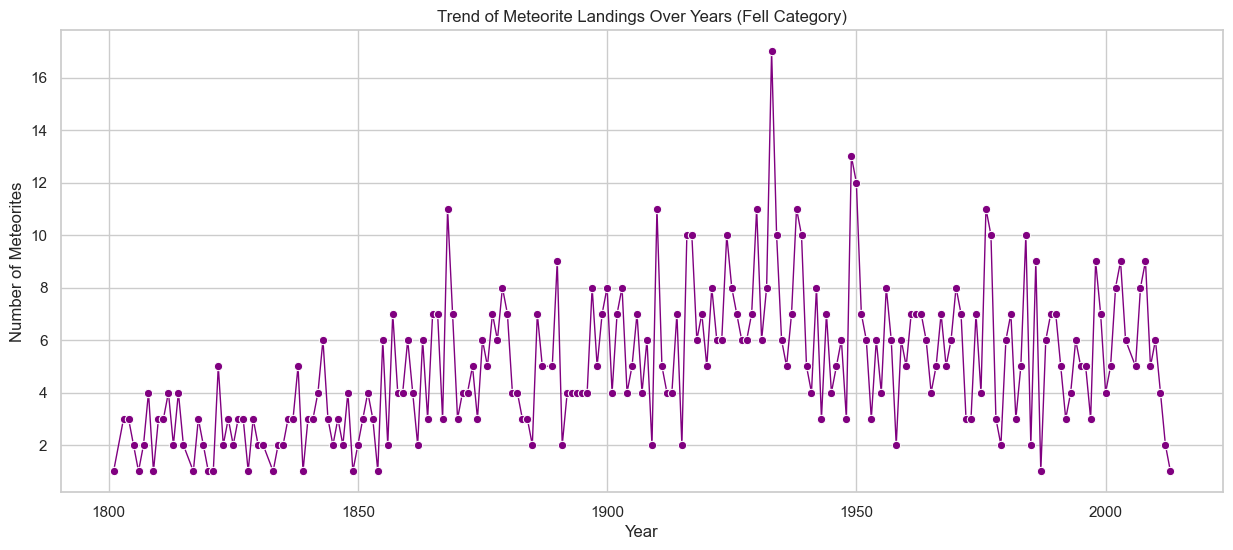

In [33]:
fell_data = meteorite_data_cleaned[meteorite_data_cleaned['fall'] == 'Fell']
fell_data1=fell_data[fell_data['year']>=1800]
# Grouping by year for 'Fell' category
fell_data2=fell_data[fell_data['year']<=2020]
fell_line_chart_data = fell_data1.groupby('year').size()

# Plotting the line chart for the 'Fell' category
plt.figure(figsize=(15, 6))
sns.lineplot(data=fell_line_chart_data, color="purple", linewidth=1,marker='o')
plt.title('Trend of Meteorite Landings Over Years (Fell Category)')
plt.xlabel('Year')
plt.ylabel('Number of Meteorites')
plt.show()